Hello,
So Here in this we will be using Colab and using CNN we will classify the images having glasses and no glasses.

In [110]:
# Firstly we need to import all required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import itertools


# New section

In [111]:
# as we know image size that we are using are 1024x1024x3 we will set image size and batch size for further usage
image_size = 1024
batch_size = 16

In [112]:
# our dataset is in gdrive so we need to import drive in colab and access that content
from google.colab import drive

In [113]:
# # mount the gdrive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [114]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [115]:
# Now as we know every pixel value ranges from 0 to 255 , we can rescale them to 0 to 1 for better classification
# also we can defiene the split percentage using validation split.
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [116]:
# Now lets read the dataset from the directory and process it.
dataset= tf.keras.preprocessing.image_dataset_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/glasses',
                                           image_size = (image_size,image_size),
                                           batch_size = batch_size)

Found 86 files belonging to 2 classes.


In [117]:
# review the different classes of the dataset
class_names = dataset.class_names
class_names


['glasses', 'no_glasses']

In [118]:
# Now that we have read and process the data its time to create a train and validation dataset using flow from directory
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/glasses',
                                           target_size=(image_size,image_size),
                                           batch_size = 16,
                                           class_mode = 'binary',
                                           subset='training',
                                           classes=['glasses', 'no_glasses'],
                                           shuffle=False
                                          )

Found 69 images belonging to 2 classes.


Here we got that 69 images are there in Train and 17 in Validation dataset

In [119]:
valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/glasses',
                                           target_size=(image_size,image_size),
                                           batch_size = 16,
                                           class_mode = 'binary',
                                           subset='validation',
                                         classes=['glasses', 'no_glasses'],
                                           shuffle=False)

Found 17 images belonging to 2 classes.


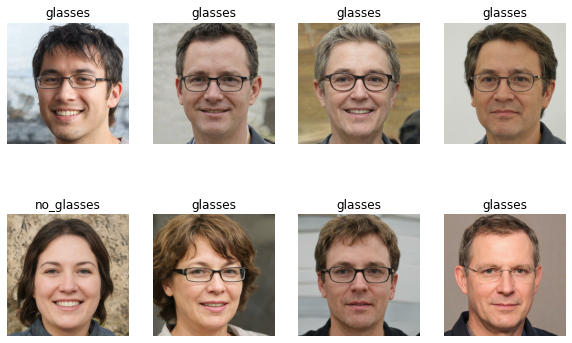

In [120]:
# Now to visualise the dataset we can use numpy to convert to uint8 and then with the help of imshow we can visualise the image.
# Here we have also used labels to give title to every image

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## **CONVOLUTIONAL NEURAL NETWORK:**

- A deep learning CNN mainly consists of : a convolutional layer,a activation layer, a pooling layer and a output layer. The convolutional layer is the first layer while the output layer is the last.


**CONVOLUTIONAL LAYER:**
- The majority of work happens in the convolutional layer, which is the core building block of a CNN. A second convolutional layer can follow the initial convolutional layer. The process of convolution involves a kernel or filter inside this layer moving across the receptive fields of the image, checking if a feature is present in the image.

- Over multiple iterations, the kernel sweeps over the entire image. After each iteration a dot product is calculated between the input pixels and the filter. The final output from the series of dots is known as a feature map or convolved feature. Ultimately, the image is converted into numerical values in this layer, which allows the CNN to interpret the image and extract relevant patterns from it.



**ACTIVATION LAYER:**
- It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

- Some examples of activation function are Sigmoid, ReLU, Leaky ReLU, Hyperbolic Tangent, Step Function..etc



**POOLING LAYER:**
- In a pooling layer, all the values of the pixels in each feature map are ‘pooled’ together. This reduces the resolution of the feature maps from the convolution layers. The smaller representation of the images means fewer parameters and less computation.


**FULLY CONNECTED LAYER :**
- Last, a CNN has fully connected layers. In a convolutional layer, the nodes only receive or share information from part of the layer before it. In a fully connected layer, every node receives the input from every node in the previous layer. 


- Fully connected layers are like those you would find in the hidden layers of an artificial neural network. This is where all the features extracted by the convolutional neural network get combined. This means that the computer sees the whole image — which can help with generating an accurate output.




#### Now along with all of these layers we apply several regularization, data augmentation 

In [206]:
# Now lets create Sequential model with Convo2D and activation function of relu thereafter we will use maxpool of 2x2 matrix
# lastly to overcome overfitting we will use dropout.

model = Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(1024,1024,3)),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    # Flatten layer is provided to make 1d array for final output

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1,activation='sigmoid')
    ])

In [207]:
# # to see the layers,shape and parameters we will use summary
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 1022, 1022, 16)    448       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 340, 340, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 340, 340, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_61 (Conv2D)          (None, 338, 338, 32)      4640      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                     

In [208]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

In [209]:
# Now we will compile the model wherein we will use adam as optimizer and binarycrossentropy as loss function. 
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [210]:
# Now to early stop the epoch we will create a patience of 10 epochs
early_stop = EarlyStopping(monitor='val_loss',patience=10)

###EPOCH
- One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
- So, it is related with gradient descent more the number of epochs more it will pass through gradient descent.

###BATCH SIZE
- As we know, we can’t pass the entire dataset into the neural net at once. So, you divide dataset into Number of Batches or sets or parts.

- Batch Size is Total number of training examples present in a single batch.

###BATCH NORMALIZATION

- it is a Normalization method used after activation function to normalize the data for faster and better result.


In [211]:
# # Finally we will fit and geanerate the model on training dataset 
epochs = 15
history = model.fit_generator(generator = trainDatagen,
                              epochs =epochs,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
5/5 [==============================] - 4s 698ms/step - loss: 1.2788 - accuracy: 0.5652 - val_loss: 0.6675 - val_accuracy: 0.6471
Epoch 2/15
5/5 [==============================] - 3s 568ms/step - loss: 0.3566 - accuracy: 0.8841 - val_loss: 0.6234 - val_accuracy: 0.7059
Epoch 3/15
5/5 [==============================] - 3s 548ms/step - loss: 0.0484 - accuracy: 0.9855 - val_loss: 0.6049 - val_accuracy: 0.7059
Epoch 4/15
5/5 [==============================] - 3s 545ms/step - loss: 0.0489 - accuracy: 1.0000 - val_loss: 0.5959 - val_accuracy: 0.7059
Epoch 5/15
5/5 [==============================] - 3s 544ms/step - loss: 0.0305 - accuracy: 0.9855 - val_loss: 0.6079 - val_accuracy: 0.7059
Epoch 6/15
5/5 [==============================] - 3s 650ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.6220 - val_accuracy: 0.7647
Epoch 7/15
5/5 [==============================] - 3s 540ms/step - loss: 9.8598e-04 - accuracy: 1.0000 - val_loss: 0.6363 - val_accuracy: 0.8235
Epoch 8/15
5/5 [

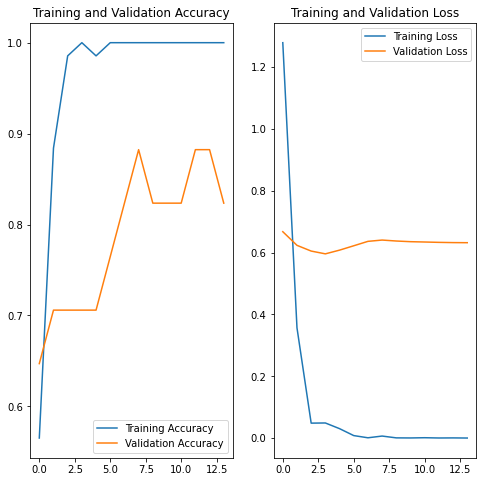

In [212]:
# Now we will look into how training and validation's Accuracy and loss are moving as per the epochs. using plots

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(14)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [213]:
# As seen in above plots train and validation are very different so, we need to do some data augmentaion to remove overfitting and also need to increase epochs 

In [214]:
# Now as we know training dataset has limited amount of data so, while using the model we won't get similar images some can little zoom, litte rotated or can be augmented in any way so,
# we will create an object of data augmentaion that will handle those in model.

data_augmentation = keras.Sequential(
  [
   layers.experimental.preprocessing.RandomRotation (0.1),
   layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [217]:
# Now that we have created data_augmentation object we will use that too in our case so that more random images can be created 
model1 = Sequential([
    data_augmentation,
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(1024,1024,3)),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(3,3),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1,activation='sigmoid')
    ])


model1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])



In [219]:
# Finally we will fit and geanerate the model on training dataset 
epochs1=50
history1 = model1.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =epochs1,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
5/5 [==============================] - 3s 666ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.7576 - val_accuracy: 0.2941
Epoch 2/50
5/5 [==============================] - 3s 574ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.7609 - val_accuracy: 0.2941
Epoch 3/50
5/5 [==============================] - 4s 700ms/step - loss: 0.0194 - accuracy: 0.9855 - val_loss: 0.7733 - val_accuracy: 0.2941
Epoch 4/50
5/5 [==============================] - 3s 575ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.6982 - val_accuracy: 0.4706
Epoch 5/50
5/5 [==============================] - 3s 695ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.6645 - val_accuracy: 0.5882
Epoch 6/50
5/5 [==============================] - 3s 550ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6618 - val_accuracy: 0.5882
Epoch 7/50
5/5 [==============================] - 3s 694ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.6653 - val_accuracy: 0.5294
Epoch 8/50
5/5 [====

- As we have increased the no of epochs there has been improvement in the accuracy of the model.


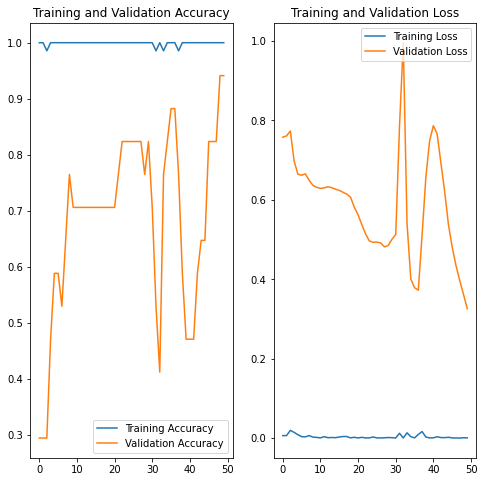

In [220]:
# Now we will look into how training and validation's Accuracy and loss are moving as per the epochs. using plots
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [221]:
# Here in this there has been increase in the accuracy of validaion set as epochs are increased and decrease in loss as epochs are increased.
# Also, we can try to improve by adding more images to the model.

In [222]:
# we will save the model so, that we can use it for future purposes.
from keras.models import load_model
model.save('glass_model_1.h5')

In [223]:
from keras.models import load_model
model1.save('/content/drive/MyDrive/Colab Notebooks/glass_model1_1.h5')

In [224]:
from keras.utils import load_img, img_to_array

# Let's create a function to predict the class of any random image

def model_predict(img_path, model):
    img = load_img(img_path, target_size=(1024, 1024))

    # Preprocessing the image
    x = img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
  
    preds = model.predict(x)
    print(preds)

    if preds<0.5:
        preds="The person is wearing glasses"
    elif preds>=0.5:
        preds="The person is not wearing glasses"
    
    
    return print(preds)

1/1 [==============================] - 0s 24ms/step
[[0.2498915]]
The person is wearing glasses


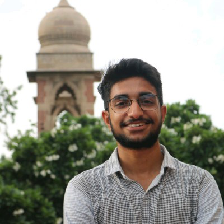

In [247]:
# Let's tes the model with random image
img_path = '/content/drive/MyDrive/Colab Notebooks/1579961813632.jfif'
image = load_img("/content/drive/MyDrive/Colab Notebooks/1579961813632.jfif", target_size=(224, 224))
model_predict(img_path, model1)
image

In [248]:
# Hurray!!! model has rightly predicted class as seen person is wearing the glasses

1/1 [==============================] - 0s 203ms/step
[[0.89460796]]
The person is not wearing glasses


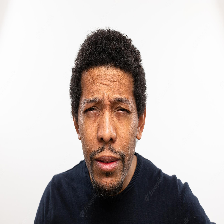

In [228]:
img_path = '/content/drive/MyDrive/Colab Notebooks/myopic-man-without-glasses-straining-his-eyes-because-he-can-t-see-well_651462-695.jpg'
image = load_img("/content/drive/MyDrive/Colab Notebooks/myopic-man-without-glasses-straining-his-eyes-because-he-can-t-see-well_651462-695.jpg", target_size=(224, 224))
model_predict(img_path, model1)
image

In [230]:
# model has Rightly predicted the class as person is not wearing glasses

In [232]:
# Now for the evaluation purpose get the labels of validation dataset
test_imgs, test_labels = valDatagen.next()
print(test_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]


In [234]:
# using the model1 we will predict the class of validation dataset images
predictions = model1.predict_generator(valDatagen, steps=valDatagen.n//valDatagen.batch_size, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


1/1 [==============================] - 1s 685ms/step


In [235]:
# let's see the predictions value
predictions

array([[0.02573497],
       [0.21473715],
       [0.31305328],
       [0.31064296],
       [0.42155495],
       [0.10681263],
       [0.79636675],
       [0.41366953],
       [0.2559177 ],
       [0.16718097],
       [0.03766789],
       [0.44043446],
       [0.9571416 ],
       [0.9957146 ],
       [0.9566623 ],
       [0.70118344]], dtype=float32)

In [241]:
# Now to prepare Confusion matrix we will need predictions value in binary of 0 or 1, for the same we will convert those to 0 if less than 0.5 else 1.
labels = (predictions > 0.5).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [242]:
# values of labels
labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [243]:
# import confusion matirx 
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(test_labels, labels)
print(classification_report(test_labels, labels))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16



In [244]:
# creating the confusion matrix function to plot the same and visualise clearly.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[11  1]
 [ 0  4]]


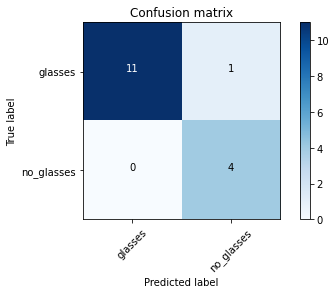

In [245]:
# using the cm function for our dataset
plot_confusion_matrix(cm,class_names)

In [150]:
# Now as per the above matrix we can clearly see that, model has performed very well as only 1 image is wrongly classified.

###CONCLUSION - 
- we can say that as epochs are increased it can help to increase the accuracy of the model.
- Thus we got val_accuracy around 94% so, we can use this model to classify for whether a person is wearing glasses or not.
